In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def fetch_etf_data(ticker, start_date, end_date):
    """
    Fetches historical data for a bond ETF.

    :param ticker: Ticker symbol for the ETF.
    :param start_date: Start date for the data.
    :param end_date: End date for the data.
    :return: DataFrame with historical data.
    """
    return yf.download(ticker, start=start_date, end=end_date)


# Example ETFs representing different maturities
etf_tickers = {
    'SHY': 'Short-Term',  # 1-3 years
    'IEI': 'Intermediate-Term',  # 3-7 years
    'TLT': 'Long-Term'  # 10-20 years
}
start_date = '2020-01-01'
end_date = '2021-01-01'

etf_data = {ticker: fetch_etf_data(ticker, start_date, end_date) for ticker in etf_tickers.keys()}



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
for ticker, data in etf_data.items():
    print(f"Data for {ticker}:")
    print(data.head(), "\n")  # Display the first few rows of data


Data for SHY:
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-01-02  84.669998  84.709999  84.639999  84.669998  80.138123  2665200
2020-01-03  84.720001  84.760002  84.690002  84.739998  80.204361  2039900
2020-01-06  84.730003  84.739998  84.680000  84.709999  80.175980  1132100
2020-01-07  84.720001  84.730003  84.699997  84.709999  80.175980  1103400
2020-01-08  84.720001  84.739998  84.660004  84.669998  80.138123  1864300 

Data for IEI:
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-01-02  125.980003  126.139999  125.900002  125.970001  119.134865  555900
2020-01-03  126.199997  126.440002  126.150002  126.370003  119.513191  673300
2020-01-06  126.480003  126.480003  126.230003  126.300003  119.446983  363500
2020-01-07  126.309998  126.370003  126.230003  12

In [35]:
# Hypothetical allocation
# Since our target is around 5 years, we might allocate more to 'IEI'
allocations = {
    'SHY': 0.35,  
    'IEI': 0.45,  
    'TLT': 0.25   
}


In [36]:
initial_investment = 10000  # Example amount in USD
investment_per_etf = {ticker: initial_investment * allocation for ticker, allocation in allocations.items()}
etf_shares = {ticker: investment_per_etf[ticker] / etf_data[ticker]['Close'].iloc[0] for ticker in etf_tickers.keys()}


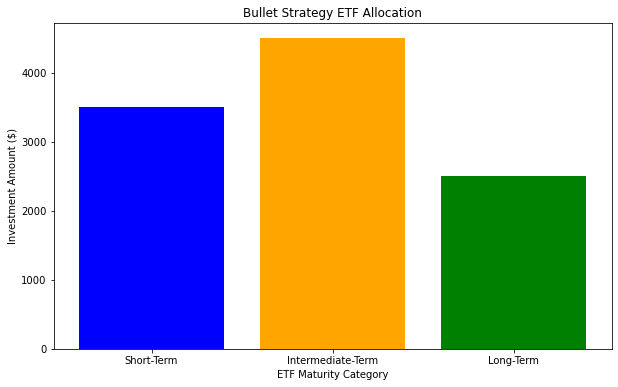

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(etf_tickers.values(), investment_per_etf.values(), color=['blue', 'orange', 'green'])
plt.title('Bullet Strategy ETF Allocation')
plt.xlabel('ETF Maturity Category')
plt.ylabel('Investment Amount ($)')
plt.show()


In [38]:
def calculate_interest_rate_risk(etf_data):
    risk_analysis = {}
    for ticker, data in etf_data.items():
        daily_returns = data['Close'].pct_change()
        volatility = daily_returns.std() * np.sqrt(252)  # Annualizing
        risk_analysis[ticker] = volatility
    return risk_analysis

interest_rate_risk = calculate_interest_rate_risk(etf_data)
print("Interest Rate Risk (Volatility):")
for ticker, risk in interest_rate_risk.items():
    print(f"{ticker}: {risk:.2%}")


Interest Rate Risk (Volatility):
SHY: 1.26%
IEI: 3.31%
TLT: 21.58%


In [39]:
# Assuming Treasury ETFs for this example
credit_risk = {ticker: 'Low' for ticker in etf_tickers}
print("\nCredit Risk Assessment:")
for ticker, risk in credit_risk.items():
    print(f"{ticker}: {risk}")



Credit Risk Assessment:
SHY: Low
IEI: Low
TLT: Low


In [40]:
# Simplified assessment - higher for longer-duration ETFs
reinvestment_risk = {'SHY': 'Low', 'IEI': 'Moderate', 'TLT': 'High'}
print("\nReinvestment Risk:")
for ticker, risk in reinvestment_risk.items():
    print(f"{ticker}: {risk}")



Reinvestment Risk:
SHY: Low
IEI: Moderate
TLT: High


In [41]:
def calculate_performance_metrics(data):
    total_return = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0]
    annualized_volatility = data['Close'].pct_change().std() * np.sqrt(252)
    
    return total_return, annualized_volatility

performance_metrics = {ticker: calculate_performance_metrics(data) for ticker, data in etf_data.items()}

# Display the performance metrics
for ticker, metrics in performance_metrics.items():
    print(f"Performance Metrics for {ticker}:")
    print(f"  Total Return: {metrics[0]:.2%}")
    print(f"  Annualized Volatility: {metrics[1]:.2%}\n")


Performance Metrics for SHY:
  Total Return: 2.02%
  Annualized Volatility: 1.26%

Performance Metrics for IEI:
  Total Return: 5.56%
  Annualized Volatility: 3.31%

Performance Metrics for TLT:
  Total Return: 15.12%
  Annualized Volatility: 21.58%



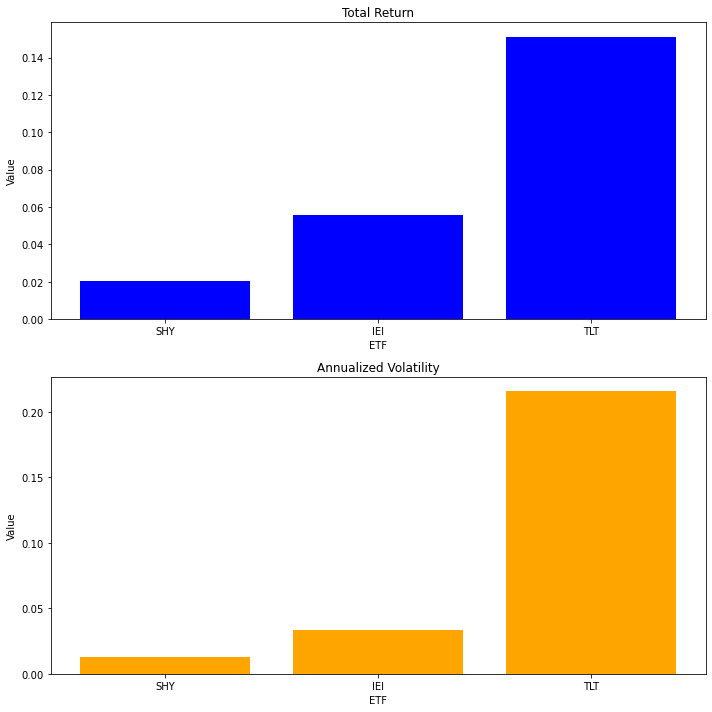

In [43]:
etf_tickers = ['SHY', 'IEI', 'TLT']
# Plotting each metric in a separate subplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Extracting the metrics for each ETF
total_returns = [performance_metrics[ticker][0] for ticker in etf_tickers]
annual_volatilities = [performance_metrics[ticker][1] for ticker in etf_tickers]

# Plotting Total Return
axes[0].bar(etf_tickers, total_returns, color='blue')
axes[0].set_title('Total Return')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('ETF')

# Plotting Annualized Volatility
axes[1].bar(etf_tickers, annual_volatilities, color='orange')
axes[1].set_title('Annualized Volatility')
axes[1].set_ylabel('Value')
axes[1].set_xlabel('ETF')

plt.tight_layout()
plt.show()


In [44]:
# Assumed annual returns for each bond type (simplified assumption)
annual_returns = {
    'SHY': 0.02,  # Example return for Short-Term
    'IEI': 0.03,  # Example return for Intermediate-Term
    'TLT': 0.04   # Example return for Long-Term
}

# Investment parameters
initial_investment = 100000
years = 10


In [45]:
# Simulating Bullet Strategy
bullet_allocation = {ticker: initial_investment / 3 for ticker in annual_returns.keys()}
bullet_portfolio_value = pd.DataFrame(np.zeros((years, len(bullet_allocation))), columns=bullet_allocation.keys())

for year in range(years):
    for ticker in bullet_allocation.keys():
        growth = bullet_allocation[ticker] * (1 + annual_returns[ticker])**year
        bullet_portfolio_value.at[year, ticker] = growth

bullet_portfolio_value['Total Value'] = bullet_portfolio_value.sum(axis=1)


In [46]:
# Simulating individual bond investments
individual_bonds_value = pd.DataFrame(np.zeros((years, len(annual_returns))), columns=annual_returns.keys())

for ticker, return_rate in annual_returns.items():
    for year in range(years):
        individual_bonds_value.at[year, ticker] = initial_investment * (1 + return_rate)**year


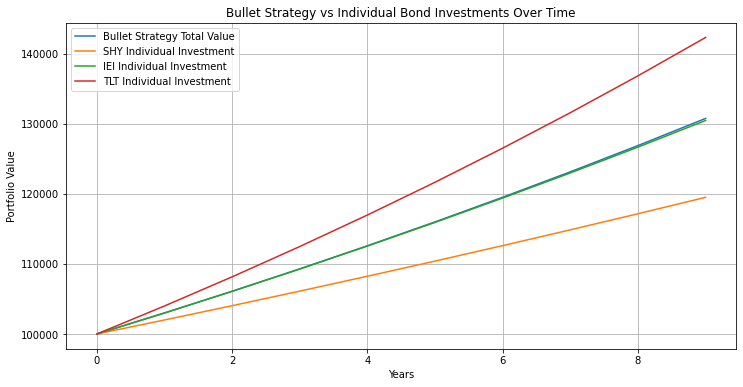

In [48]:
plt.figure(figsize=(12, 6))

# Plotting Bullet Strategy Total Value
plt.plot(bullet_portfolio_value['Total Value'], label='Bullet Strategy Total Value')

# Plotting Individual Bond Investments
for ticker in individual_bonds_value.columns:
    plt.plot(individual_bonds_value[ticker], label=f'{ticker} Individual Investment')

plt.title('Bullet Strategy vs Individual Bond Investments Over Time')
plt.xlabel('Years')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()
